In [59]:
import pandas as pd

df = pd.read_csv('./housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [61]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

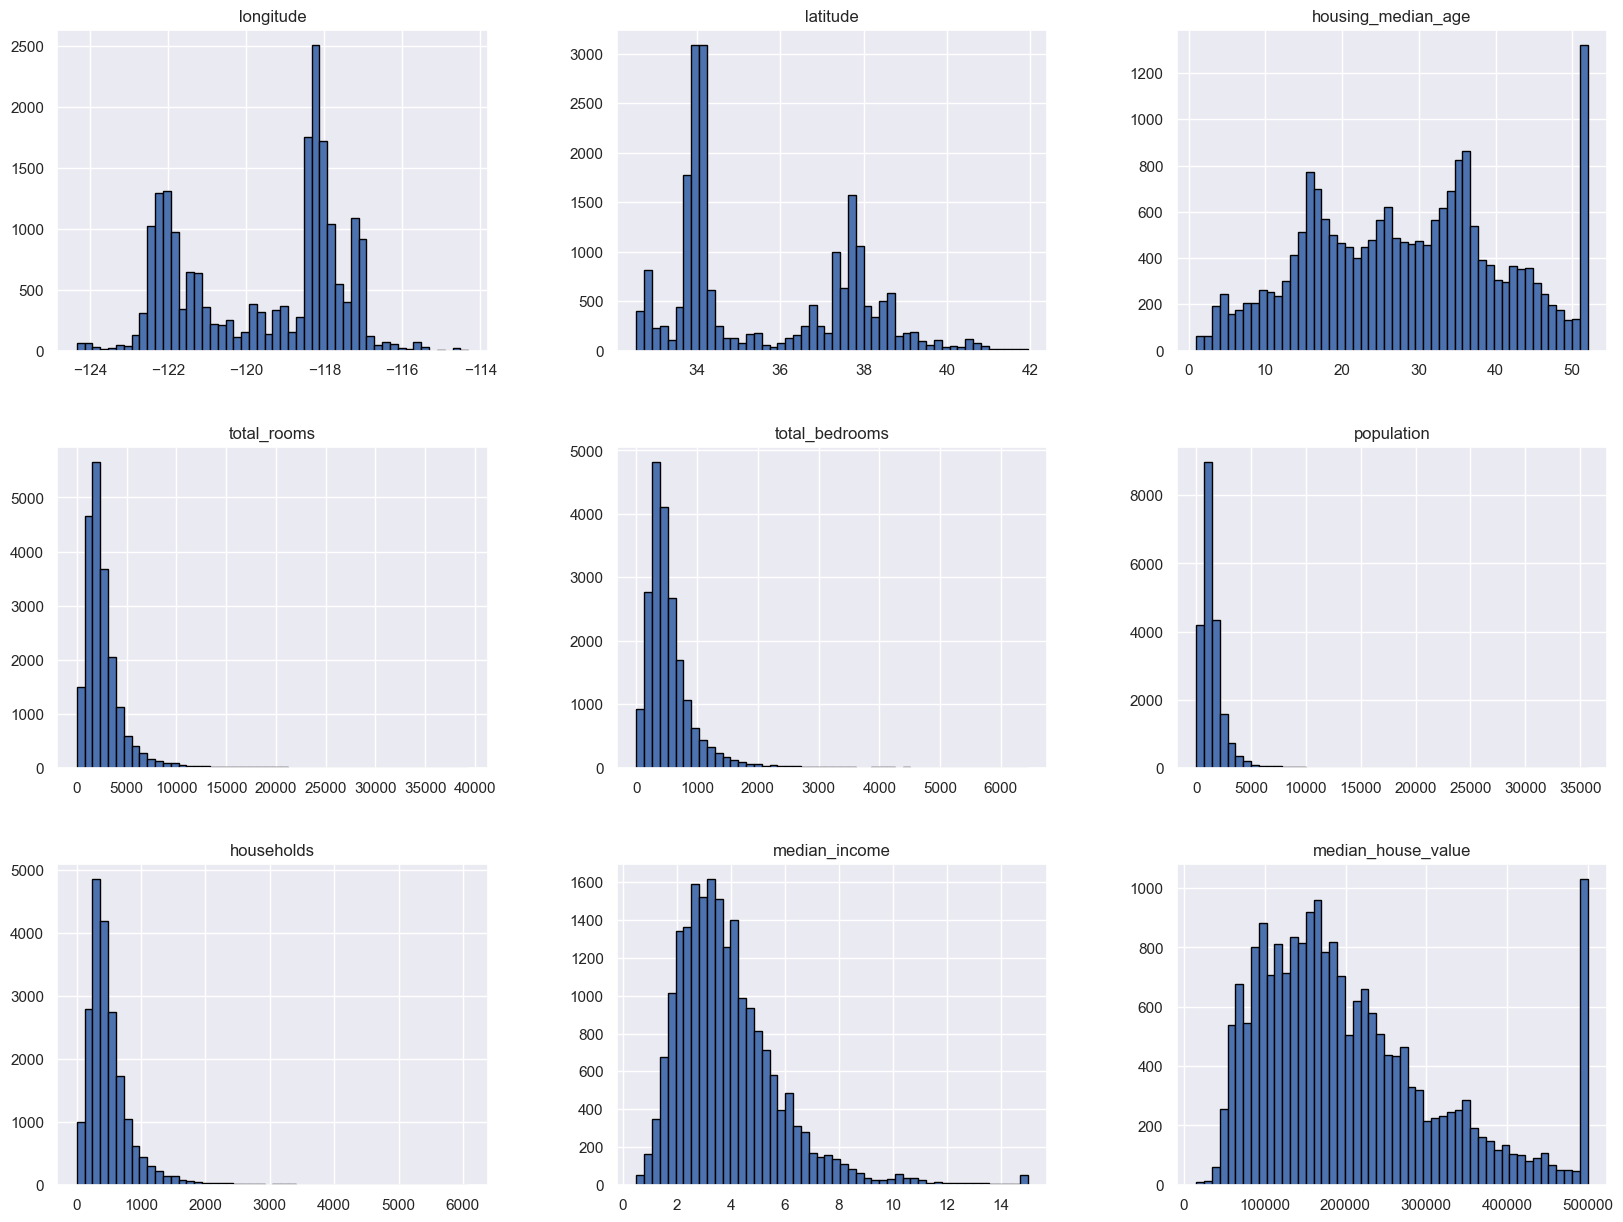

In [62]:
df.hist(bins=50, figsize=(20,15), edgecolor='black')

In [63]:
datos = df.dropna() # Elimina los valores nulos

<Axes: xlabel='latitude', ylabel='longitude'>

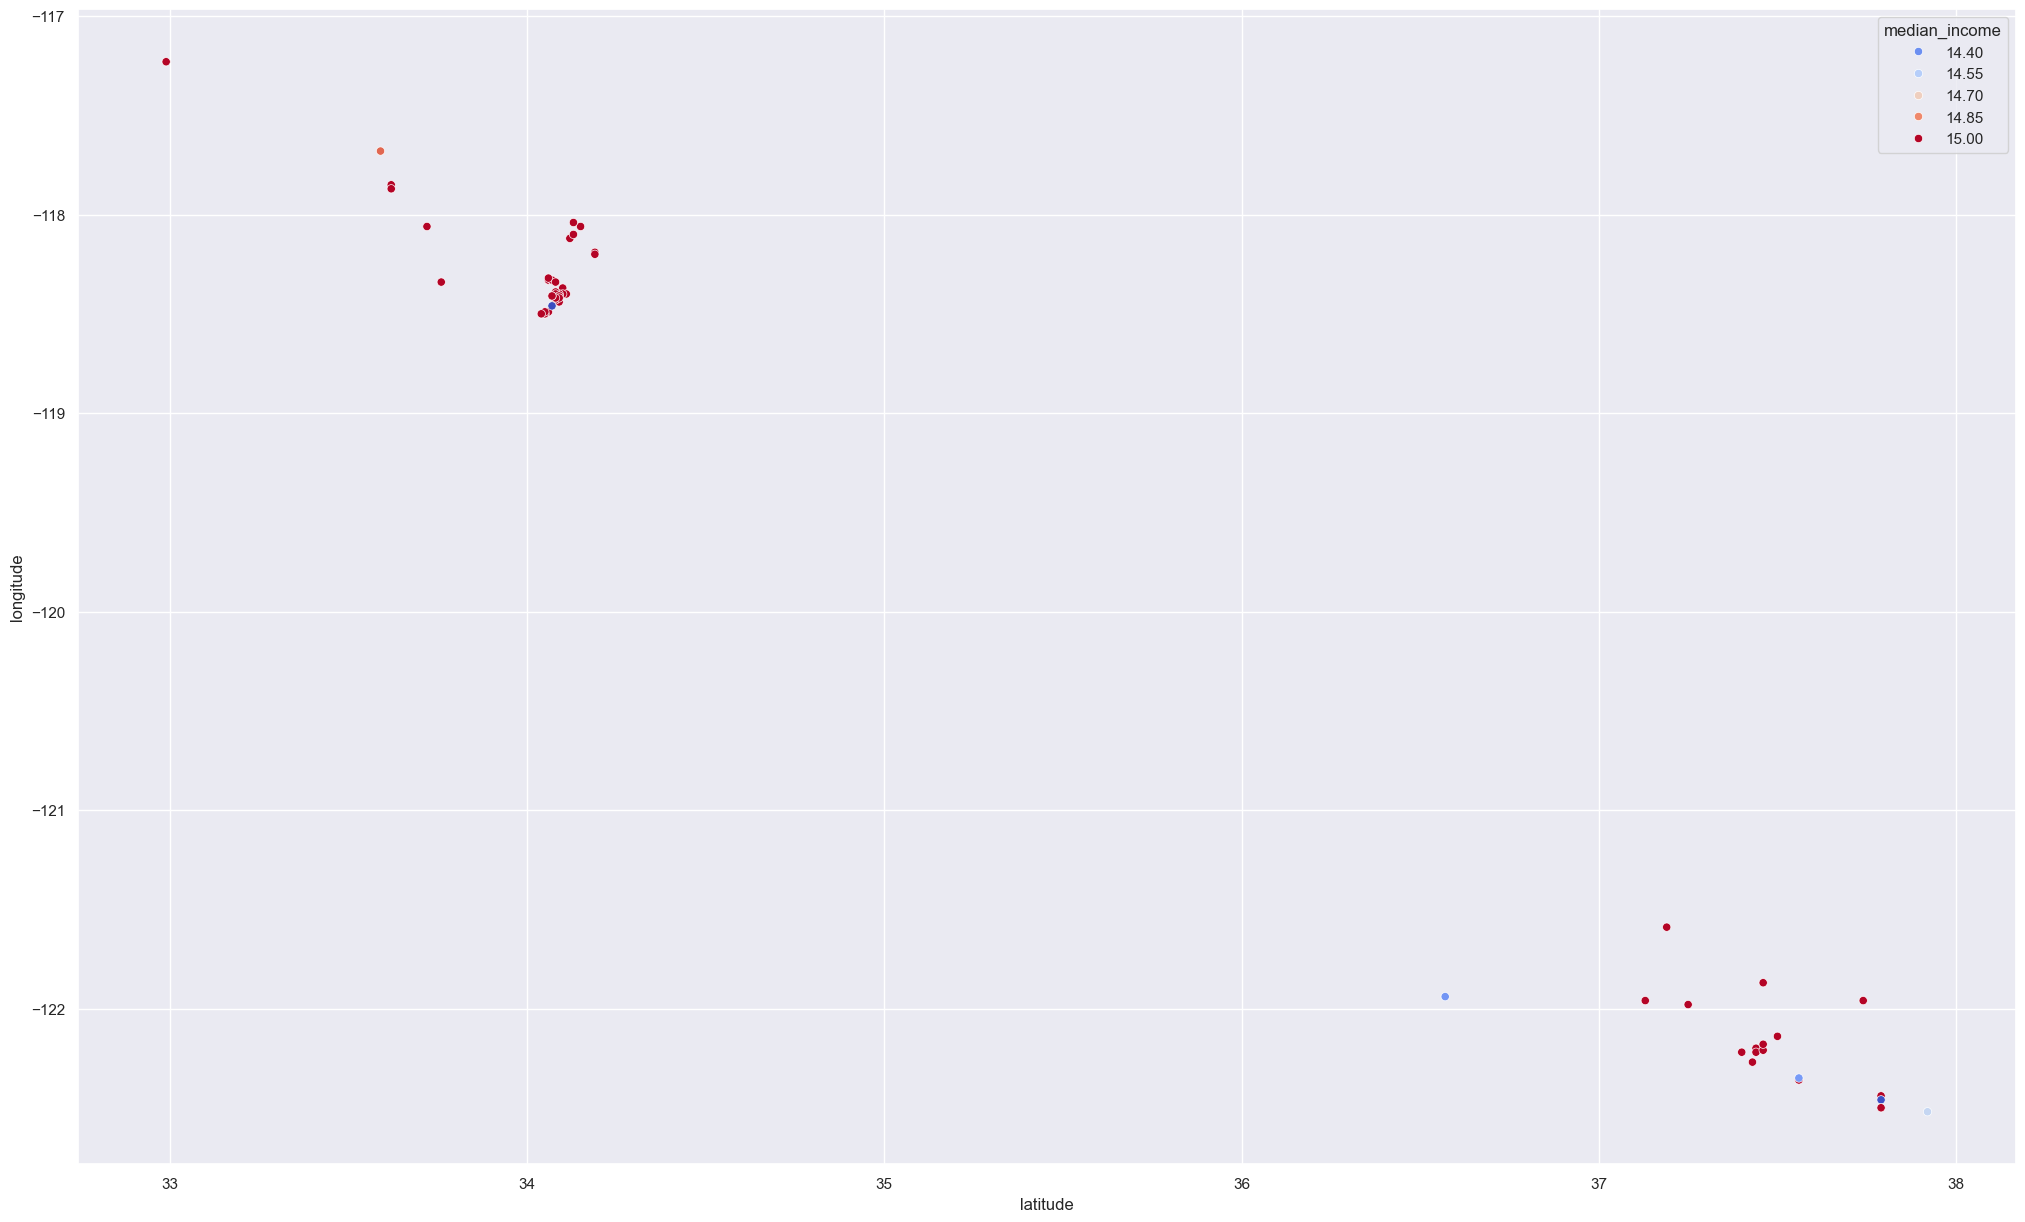

In [64]:
import seaborn as sb
sb.scatterplot(data=datos[datos['median_income'] > 14], x='latitude', y='longitude', hue='median_income', palette='coolwarm')

In [65]:
datos['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [66]:
#datos dummies
dummies = pd.get_dummies(datos['ocean_proximity'], dtype=int)

In [67]:
#concatenar al DF los dummies extraidos de la proximidad al oceano 
datos = pd.concat([datos, dummies], axis=1)

In [68]:
datos.drop('ocean_proximity', axis=1, inplace=True) #afectar al df original

In [69]:
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [70]:
datos.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

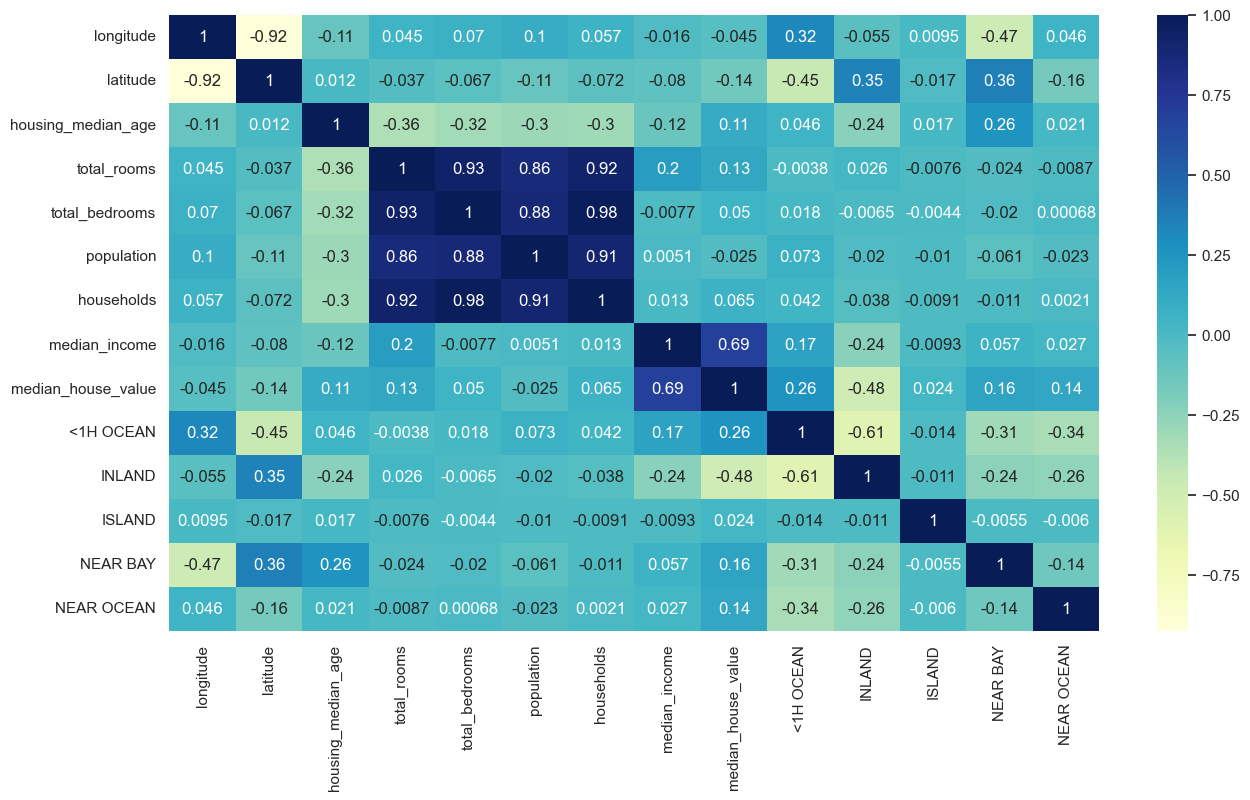

In [71]:
sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos.corr(), annot=True, cmap='YlGnBu')

In [72]:
datos.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

In [73]:
datos['room_ratio'] = datos['total_rooms'] / datos['total_bedrooms'] #relacion entre habitaciones y dormitorios

In [74]:
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,room_ratio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.821705
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.418626
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,7.721053
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.421277
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,5.810714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,4.451872
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,4.646667
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,4.647423
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,4.547677


In [75]:
# obtener las caracteristicas y la etiqueta

# caracteristicas de entrada
X = datos.drop('median_house_value', axis=1) #axis = 1, para eliminar la columna

#etiqueta
y = datos['median_house_value']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [78]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

#entrenamiento
modelo.fit(X_train, y_train)

LinearRegression()

In [79]:
#X_test: son datos que el modelo no ha visto nunca
predicciones = modelo.predict(X_test)

In [80]:
comparativa = {"predicciones":predicciones, "valor real": y_test}
result = pd.DataFrame(comparativa)
result

,predicciones,valor real
15424,230274.832708,156900.0
9859,232439.068804,195300.0
11220,154273.658801,157500.0
18070,372855.824707,500001.0
8555,308933.871460,345800.0
...,...,...
17827,293611.347339,272700.0
10446,301609.998607,346200.0
11711,105013.752490,146900.0
17630,275592.021973,240500.0


In [81]:
modelo.score(X_test, y_test)

0.6557186572107511

In [82]:
modelo.score(X_train, y_train)

0.6470377037305851

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
X_train_scaled

array([[-1.39300244e+00,  2.31079837e+00,  1.90038494e-01, ...,
        -3.50125312e-01, -3.85825608e-01, -1.67791664e-01],
       [ 6.51855928e-01, -3.34881466e-01, -6.84972682e-01, ...,
        -3.50125312e-01, -3.85825608e-01,  1.70285605e-03],
       [-1.41800071e+00,  9.38790949e-01,  7.46863788e-01, ...,
        -3.50125312e-01,  2.59184455e+00, -4.19340789e-01],
       ...,
       [-1.24801248e+00,  1.08863476e+00,  4.28677906e-01, ...,
         2.85612027e+00, -3.85825608e-01,  7.19729256e-01],
       [-1.21801456e+00,  7.84264516e-01, -4.46333271e-01, ...,
        -3.50125312e-01, -3.85825608e-01,  1.15786175e+00],
       [ 8.56841730e-01, -8.82747909e-01, -1.79862327e+00, ...,
        -3.50125312e-01, -3.85825608e-01, -2.01499452e+00]])

In [85]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, predicciones)

mse = np.sqrt(mse) #valor promedio de "fallo" al predecir los precios de las casas con valores conocidos
mse

np.float64(67011.93706059837)

ANALISIS DE DATOS PARA AUMENTAR LA PRECISION DEL MODELO        


**1.** Crear nuevas caracteristicas a partir de las existentes

In [86]:
#rooms_per_household = total_rooms / households
#Calcula el promedio de habitaciones por hogar, lo que puede reflejar el tamaño de los hogares.
datos['rooms_per_household'] = datos['total_rooms'] / datos['households']

#income_per_capita = median_income / population
#Calcula el ingreso per cápita, lo que puede reflejar la riqueza de la población.
datos['income_per_capita'] = datos['median_income'] / datos['population']

In [87]:
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,room_ratio,rooms_per_household,income_per_capita
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.821705,6.984127,0.025855
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.418626,6.238137,0.003457
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,7.721053,8.288136,0.014632
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.421277,5.817352,0.010113
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,5.810714,6.281853,0.006807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,4.451872,5.045455,0.001847
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,4.646667,6.114035,0.007182
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,4.647423,5.205543,0.001688
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,4.547677,5.329513,0.002520


<Axes: >

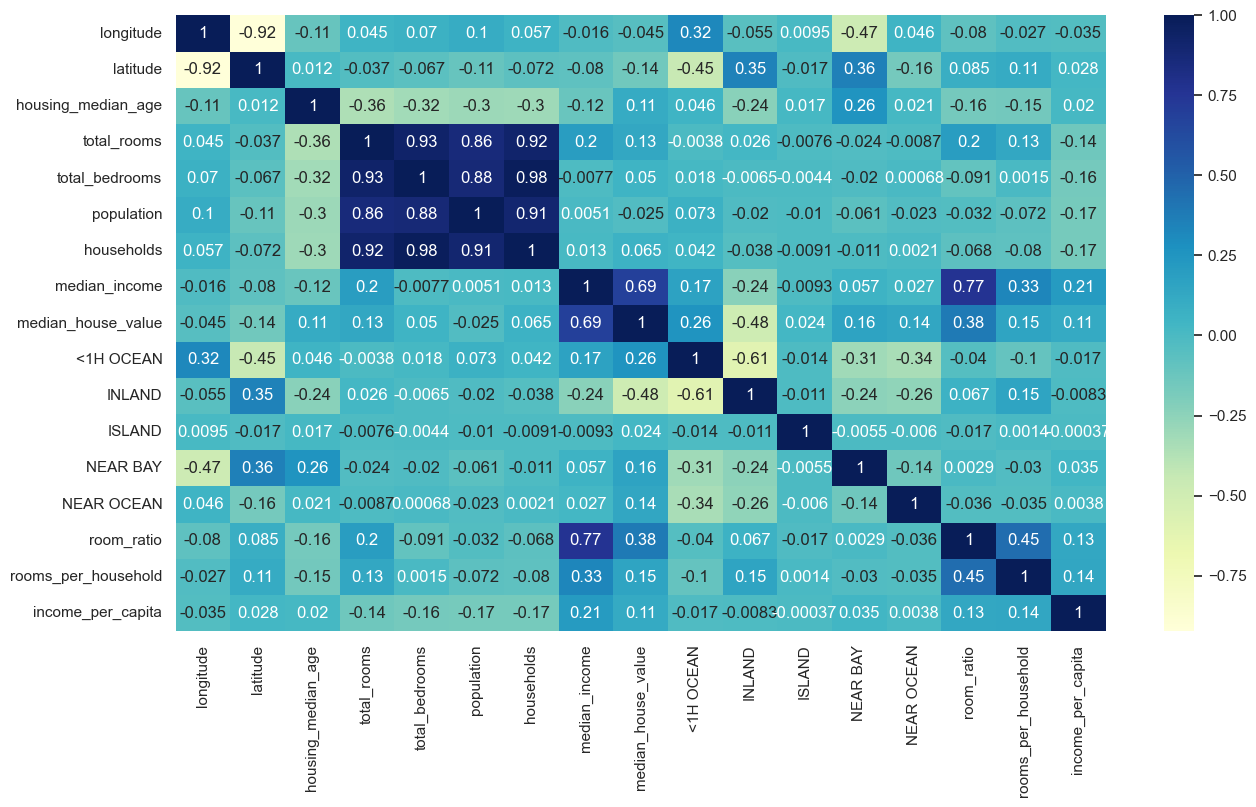

In [88]:
datos.corr()
sb.heatmap(data=datos.corr(), annot=True, cmap='YlGnBu')

In [89]:
datos.corr()['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688355
room_ratio             0.383920
<1H OCEAN              0.257614
NEAR BAY               0.160526
rooms_per_household    0.151344
NEAR OCEAN             0.140378
total_rooms            0.133294
income_per_capita      0.114895
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
ISLAND                 0.023525
population            -0.025300
longitude             -0.045398
latitude              -0.144638
INLAND                -0.484787
Name: median_house_value, dtype: float64

In [90]:
#Reentrenamiento
from sklearn.metrics import mean_squared_error, r2_score

X = datos.drop('median_house_value', axis=1) 
y = datos['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)

score_test = modelo.score(X_test, y_test)
score_train = modelo.score(X_train, y_train)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"Score test: {score_test}")
print(f"Score train: {score_train}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")



Score test: 0.6515341963165286
Score train: 0.6510031763382316
Mean Squared Error: 68124.06229493771
R2 Score: 0.6515341963165286


**2.** Suavizar valores atipicos

In [91]:
#• Si una casa tiene 50 años o más, el dato indica 50.
limite_housing_age = datos[datos['housing_median_age'] >= 50]
#• Si el precio de una casa es 500,000 o más, el dato indica 500,000.
limite_house_value = datos[datos['median_house_value'] >= 500000]
#• Ingresos, con un máximo de 15.
limite_median_income = datos[datos['median_income'] >= 15]

In [92]:
limite_housing_age

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,room_ratio,rooms_per_household,income_per_capita
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,7.721053,8.288136,0.014632
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.421277,5.817352,0.010113
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,5.810714,6.281853,0.006807
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0,4.314554,4.761658,0.009774
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0,5.184049,4.931907,0.003345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20235,-119.27,34.28,50.0,1710.0,412.0,915.0,380.0,3.1757,206300.0,0,0,0,0,1,4.150485,4.500000,0.003471
20236,-119.27,34.27,52.0,459.0,112.0,276.0,107.0,2.3750,198400.0,0,0,0,0,1,4.098214,4.289720,0.008605
20237,-119.27,34.27,52.0,1577.0,343.0,836.0,335.0,3.5893,206600.0,0,0,0,0,1,4.597668,4.707463,0.004293
20443,-118.85,34.27,50.0,187.0,33.0,130.0,35.0,3.3438,500001.0,1,0,0,0,0,5.666667,5.342857,0.025722


In [93]:
limite_house_value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,room_ratio,rooms_per_household,income_per_capita
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,0,0,0,1,0,3.192308,2.929412,0.003140
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,0,0,0,1,0,2.580508,2.436000,0.000867
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,0,0,0,1,0,7.413333,7.794393,0.015188
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,0,0,0,1,0,7.860759,7.512097,0.006878
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,0,0,0,1,0,7.889182,8.282548,0.008318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,1,0,0,0,0,5.714829,6.958333,0.008934
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,1,0,0,0,0,8.528986,9.890756,0.024210
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,1,0,0,0,0,7.008101,7.236059,0.001574
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,1,0,0,0,0,8.955990,9.873315,0.010638


In [94]:
limite_median_income

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,room_ratio,rooms_per_household,income_per_capita
1566,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,350000.0,1,0,0,0,0,10.000000,22.222222,0.600004
4352,-118.37,34.10,37.0,407.0,67.0,100.0,47.0,15.0001,500001.0,1,0,0,0,0,6.074627,8.659574,0.150001
4604,-118.33,34.06,52.0,1841.0,240.0,693.0,218.0,15.0001,500001.0,1,0,0,0,0,7.670833,8.444954,0.021645
4605,-118.33,34.07,52.0,2248.0,255.0,813.0,265.0,15.0001,500001.0,1,0,0,0,0,8.815686,8.483019,0.018450
4606,-118.33,34.07,52.0,1482.0,171.0,531.0,161.0,15.0001,500001.0,1,0,0,0,0,8.666667,9.204969,0.028249
4626,-118.32,34.06,52.0,955.0,100.0,457.0,120.0,15.0001,500001.0,1,0,0,0,0,9.550000,7.958333,0.032823
4678,-118.34,34.08,52.0,1721.0,195.0,688.0,196.0,15.0001,500001.0,1,0,0,0,0,8.825641,8.780612,0.021802
5242,-118.40,34.11,32.0,5578.0,753.0,1567.0,697.0,15.0001,500001.0,1,0,0,0,0,7.407703,8.002869,0.009572
5247,-118.44,34.09,36.0,3129.0,392.0,862.0,334.0,15.0001,500001.0,1,0,0,0,0,7.982143,9.368263,0.017402
5248,-118.43,34.08,46.0,778.0,90.0,238.0,93.0,15.0001,500001.0,1,0,0,0,0,8.644444,8.365591,0.063026


In [95]:
# Crear bins para 'housing_median_age'
bins = [0, 50, np.inf]
labels = ['0-50', '50+']

# Crear una nueva columna con los bins
datos['age_bins'] = pd.cut(datos['housing_median_age'], bins=bins, labels=labels, right=False)

# Primeros registros para verificar
datos[['housing_median_age', 'age_bins']].head()

,housing_median_age,age_bins
0,41.0,0-50
1,21.0,0-50
2,52.0,50+
3,52.0,50+
4,52.0,50+


In [96]:
# volver a dummies
age_bins_dummies = pd.get_dummies(datos['age_bins'], prefix='age_bin', dtype=int)
datos = pd.concat([datos, age_bins_dummies], axis=1)
datos.drop('age_bins', axis=1, inplace=True)
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,room_ratio,rooms_per_household,income_per_capita,age_bin_0-50,age_bin_50+
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.821705,6.984127,0.025855,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.418626,6.238137,0.003457,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,7.721053,8.288136,0.014632,0,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.421277,5.817352,0.010113,0,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,5.810714,6.281853,0.006807,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,4.451872,5.045455,0.001847,1,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,4.646667,6.114035,0.007182,1,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,4.647423,5.205543,0.001688,1,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,4.547677,5.329513,0.002520,1,0


In [97]:
#Reentrenamiento
X = datos.drop('median_house_value', axis=1) 
y = datos['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)

score_test = modelo.score(X_test, y_test)
score_train = modelo.score(X_train, y_train)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"Score test: {score_test}")
print(f"Score train: {score_train}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Score test: 0.6530758657167262
Score train: 0.6541070316674722
Mean Squared Error: 68288.49559978356
R2 Score: 0.6530758657167262


In [98]:
# Crear bins para 'median_income'
bins = [0, 10, 15, np.inf]
labels = ['0-10', '10-15', '15+']

datos['income_bins'] = pd.cut(datos['median_income'], bins=bins, labels=labels, right=False)
datos[['median_income', 'income_bins']]

,median_income,income_bins
0,8.3252,0-10
1,8.3014,0-10
2,7.2574,0-10
3,5.6431,0-10
4,3.8462,0-10
...,...,...
20635,1.5603,0-10
20636,2.5568,0-10
20637,1.7000,0-10
20638,1.8672,0-10


In [99]:
# volver a dummies
income_bins_dummies = pd.get_dummies(datos['income_bins'], prefix='income_bin', dtype=int)
datos = pd.concat([datos, income_bins_dummies], axis=1)
datos.drop('income_bins', axis=1, inplace=True)
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,...,NEAR BAY,NEAR OCEAN,room_ratio,rooms_per_household,income_per_capita,age_bin_0-50,age_bin_50+,income_bin_0-10,income_bin_10-15,income_bin_15+
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,...,1,0,6.821705,6.984127,0.025855,1,0,1,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,...,1,0,6.418626,6.238137,0.003457,1,0,1,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,...,1,0,7.721053,8.288136,0.014632,0,1,1,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,...,1,0,5.421277,5.817352,0.010113,0,1,1,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,...,1,0,5.810714,6.281853,0.006807,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,...,0,0,4.451872,5.045455,0.001847,1,0,1,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,...,0,0,4.646667,6.114035,0.007182,1,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,...,0,0,4.647423,5.205543,0.001688,1,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,...,0,0,4.547677,5.329513,0.002520,1,0,1,0,0


In [100]:
#registros con ingresos entre 10 y 15
datos[(datos['income_bin_10-15'] == 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,...,NEAR BAY,NEAR OCEAN,room_ratio,rooms_per_household,income_per_capita,age_bin_0-50,age_bin_50+,income_bin_0-10,income_bin_10-15,income_bin_15+
131,-122.19,37.84,18.0,1617.0,210.0,533.0,194.0,11.6017,392600.0,0,...,1,0,7.700000,8.335052,0.021767,1,0,0,1,0
409,-122.28,37.90,52.0,2003.0,250.0,658.0,244.0,10.0825,397000.0,0,...,1,0,8.012000,8.209016,0.015323,0,1,0,1,0
510,-122.22,37.82,39.0,2492.0,310.0,808.0,315.0,11.8603,500001.0,0,...,1,0,8.038710,7.911111,0.014679,1,0,0,1,0
511,-122.22,37.82,42.0,2991.0,335.0,1018.0,335.0,13.4990,500001.0,0,...,1,0,8.928358,8.928358,0.013260,1,0,0,1,0
512,-122.23,37.82,52.0,3242.0,366.0,1001.0,352.0,12.2138,500001.0,0,...,1,0,8.857923,9.210227,0.012202,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20376,-118.86,34.16,16.0,1509.0,216.0,578.0,235.0,10.2614,410800.0,1,...,0,0,6.986111,6.421277,0.017753,1,0,0,1,0
20380,-118.83,34.14,16.0,1316.0,194.0,450.0,173.0,10.1597,500001.0,0,...,0,1,6.783505,7.606936,0.022577,1,0,0,1,0
20389,-118.90,34.19,26.0,1582.0,196.0,573.0,182.0,10.0595,500001.0,1,...,0,0,8.071429,8.692308,0.017556,1,0,0,1,0
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,1,...,0,0,8.528986,9.890756,0.024210,1,0,0,1,0


In [101]:
#registros con ingresos mayores a 15
datos[(datos['income_bin_15+'] == 1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,...,NEAR BAY,NEAR OCEAN,room_ratio,rooms_per_household,income_per_capita,age_bin_0-50,age_bin_50+,income_bin_0-10,income_bin_10-15,income_bin_15+
1566,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,350000.0,1,...,0,0,10.000000,22.222222,0.600004,1,0,0,0,1
4352,-118.37,34.10,37.0,407.0,67.0,100.0,47.0,15.0001,500001.0,1,...,0,0,6.074627,8.659574,0.150001,1,0,0,0,1
4604,-118.33,34.06,52.0,1841.0,240.0,693.0,218.0,15.0001,500001.0,1,...,0,0,7.670833,8.444954,0.021645,0,1,0,0,1
4605,-118.33,34.07,52.0,2248.0,255.0,813.0,265.0,15.0001,500001.0,1,...,0,0,8.815686,8.483019,0.018450,0,1,0,0,1
4606,-118.33,34.07,52.0,1482.0,171.0,531.0,161.0,15.0001,500001.0,1,...,0,0,8.666667,9.204969,0.028249,0,1,0,0,1
4626,-118.32,34.06,52.0,955.0,100.0,457.0,120.0,15.0001,500001.0,1,...,0,0,9.550000,7.958333,0.032823,0,1,0,0,1
4678,-118.34,34.08,52.0,1721.0,195.0,688.0,196.0,15.0001,500001.0,1,...,0,0,8.825641,8.780612,0.021802,0,1,0,0,1
5242,-118.40,34.11,32.0,5578.0,753.0,1567.0,697.0,15.0001,500001.0,1,...,0,0,7.407703,8.002869,0.009572,1,0,0,0,1
5247,-118.44,34.09,36.0,3129.0,392.0,862.0,334.0,15.0001,500001.0,1,...,0,0,7.982143,9.368263,0.017402,1,0,0,0,1
5248,-118.43,34.08,46.0,778.0,90.0,238.0,93.0,15.0001,500001.0,1,...,0,0,8.644444,8.365591,0.063026,1,0,0,0,1


In [102]:
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,...,NEAR BAY,NEAR OCEAN,room_ratio,rooms_per_household,income_per_capita,age_bin_0-50,age_bin_50+,income_bin_0-10,income_bin_10-15,income_bin_15+
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,...,1,0,6.821705,6.984127,0.025855,1,0,1,0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,...,1,0,6.418626,6.238137,0.003457,1,0,1,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,...,1,0,7.721053,8.288136,0.014632,0,1,1,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,...,1,0,5.421277,5.817352,0.010113,0,1,1,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,...,1,0,5.810714,6.281853,0.006807,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,...,0,0,4.451872,5.045455,0.001847,1,0,1,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,...,0,0,4.646667,6.114035,0.007182,1,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,...,0,0,4.647423,5.205543,0.001688,1,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,...,0,0,4.547677,5.329513,0.002520,1,0,1,0,0


In [103]:
#Reentrenamiento
X = datos.drop('median_house_value', axis=1)
y = datos['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)

score_test = modelo.score(X_test, y_test)
score_train = modelo.score(X_train, y_train)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"Score test: {score_test}")
print(f"Score train: {score_train}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Score test: 0.6693791381571563
Score train: 0.6617950973627428
Mean Squared Error: 66766.28801968145
R2 Score: 0.6693791381571563


In [104]:
# Crear bins para 'median_house_value' para agrupar los valores en rangos
bins = [0, 500000, np.inf]
labels = ['0-500k', '500k+']

datos['value_bins'] = pd.cut(datos['median_house_value'], bins=bins, labels=labels, right=False)

datos[['median_house_value', 'value_bins']].head()

,median_house_value,value_bins
0,452600.0,0-500k
1,358500.0,0-500k
2,352100.0,0-500k
3,341300.0,0-500k
4,342200.0,0-500k


In [105]:
# volver a dummies
value_bins_dummies = pd.get_dummies(datos['value_bins'], prefix='value_bin', dtype=int)
datos = pd.concat([datos, value_bins_dummies], axis=1)
datos.drop('value_bins', axis=1, inplace=True)
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,...,room_ratio,rooms_per_household,income_per_capita,age_bin_0-50,age_bin_50+,income_bin_0-10,income_bin_10-15,income_bin_15+,value_bin_0-500k,value_bin_500k+
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,...,6.821705,6.984127,0.025855,1,0,1,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,...,6.418626,6.238137,0.003457,1,0,1,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,...,7.721053,8.288136,0.014632,0,1,1,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,...,5.421277,5.817352,0.010113,0,1,1,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,...,5.810714,6.281853,0.006807,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,...,4.451872,5.045455,0.001847,1,0,1,0,0,1,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,...,4.646667,6.114035,0.007182,1,0,1,0,0,1,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,...,4.647423,5.205543,0.001688,1,0,1,0,0,1,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,...,4.547677,5.329513,0.002520,1,0,1,0,0,1,0


In [106]:
#Reentrenamiento
X = datos.drop('median_house_value', axis=1)
y = datos['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)

score_test = modelo.score(X_test, y_test)
score_train = modelo.score(X_train, y_train)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"Score test: {score_test}")
print(f"Score train: {score_train}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Score test: 0.7309171887941053
Score train: 0.7293292985961093
Mean Squared Error: 59884.062633002104
R2 Score: 0.7309171887941053


In [107]:
datos.drop('value_bin_0-500k', axis=1, inplace=True)
datos.drop('value_bin_500k+', axis=1, inplace=True)

In [108]:
# Modificar el numero y rango de bins para 'median_house_value' para mejorar la precision del modelo
bins = [0, 100000, 200000, 300000, 400000, 500000, np.inf]
labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k+']

datos['value_bins'] = pd.cut(datos['median_house_value'], bins=bins, labels=labels, right=False)

datos[['median_house_value', 'value_bins']].head()

,median_house_value,value_bins
0,452600.0,400k-500k
1,358500.0,300k-400k
2,352100.0,300k-400k
3,341300.0,300k-400k
4,342200.0,300k-400k


In [109]:
# volver a dummies
value_bins_dummies = pd.get_dummies(datos['value_bins'], prefix='value_bin', dtype=int)
datos = pd.concat([datos, value_bins_dummies], axis=1)
datos.drop('value_bins', axis=1, inplace=True)
datos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,...,age_bin_50+,income_bin_0-10,income_bin_10-15,income_bin_15+,value_bin_0-100k,value_bin_100k-200k,value_bin_200k-300k,value_bin_300k-400k,value_bin_400k-500k,value_bin_500k+
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,...,0,1,0,0,0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,...,0,1,0,0,0,0,0,1,0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,...,1,1,0,0,0,0,0,1,0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,...,1,1,0,0,0,0,0,1,0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,...,0,1,0,0,1,0,0,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,...,0,1,0,0,1,0,0,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,...,0,1,0,0,1,0,0,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,...,0,1,0,0,1,0,0,0,0,0


In [110]:
#Reentrenamiento
X = datos.drop('median_house_value', axis=1)
y = datos['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)
    
score_test = modelo.score(X_test, y_test)
score_train = modelo.score(X_train, y_train)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"Score test: {score_test}")
print(f"Score train: {score_train}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Score test: 0.9598872817877541
Score train: 0.9598906447829842
Mean Squared Error: 23168.38666333522
R2 Score: 0.9598872817877541


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>],
       [<Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'room_ratio'}>],
       [<Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': 'income_per_capita'}>,
        <Axes: title={'center': 'age_bin_0-50'}>,
        <Axes: title={'center': 'age_bin_50+'}>,
        <Axes: title={'center': 'income_bin_0-10'}>],
  

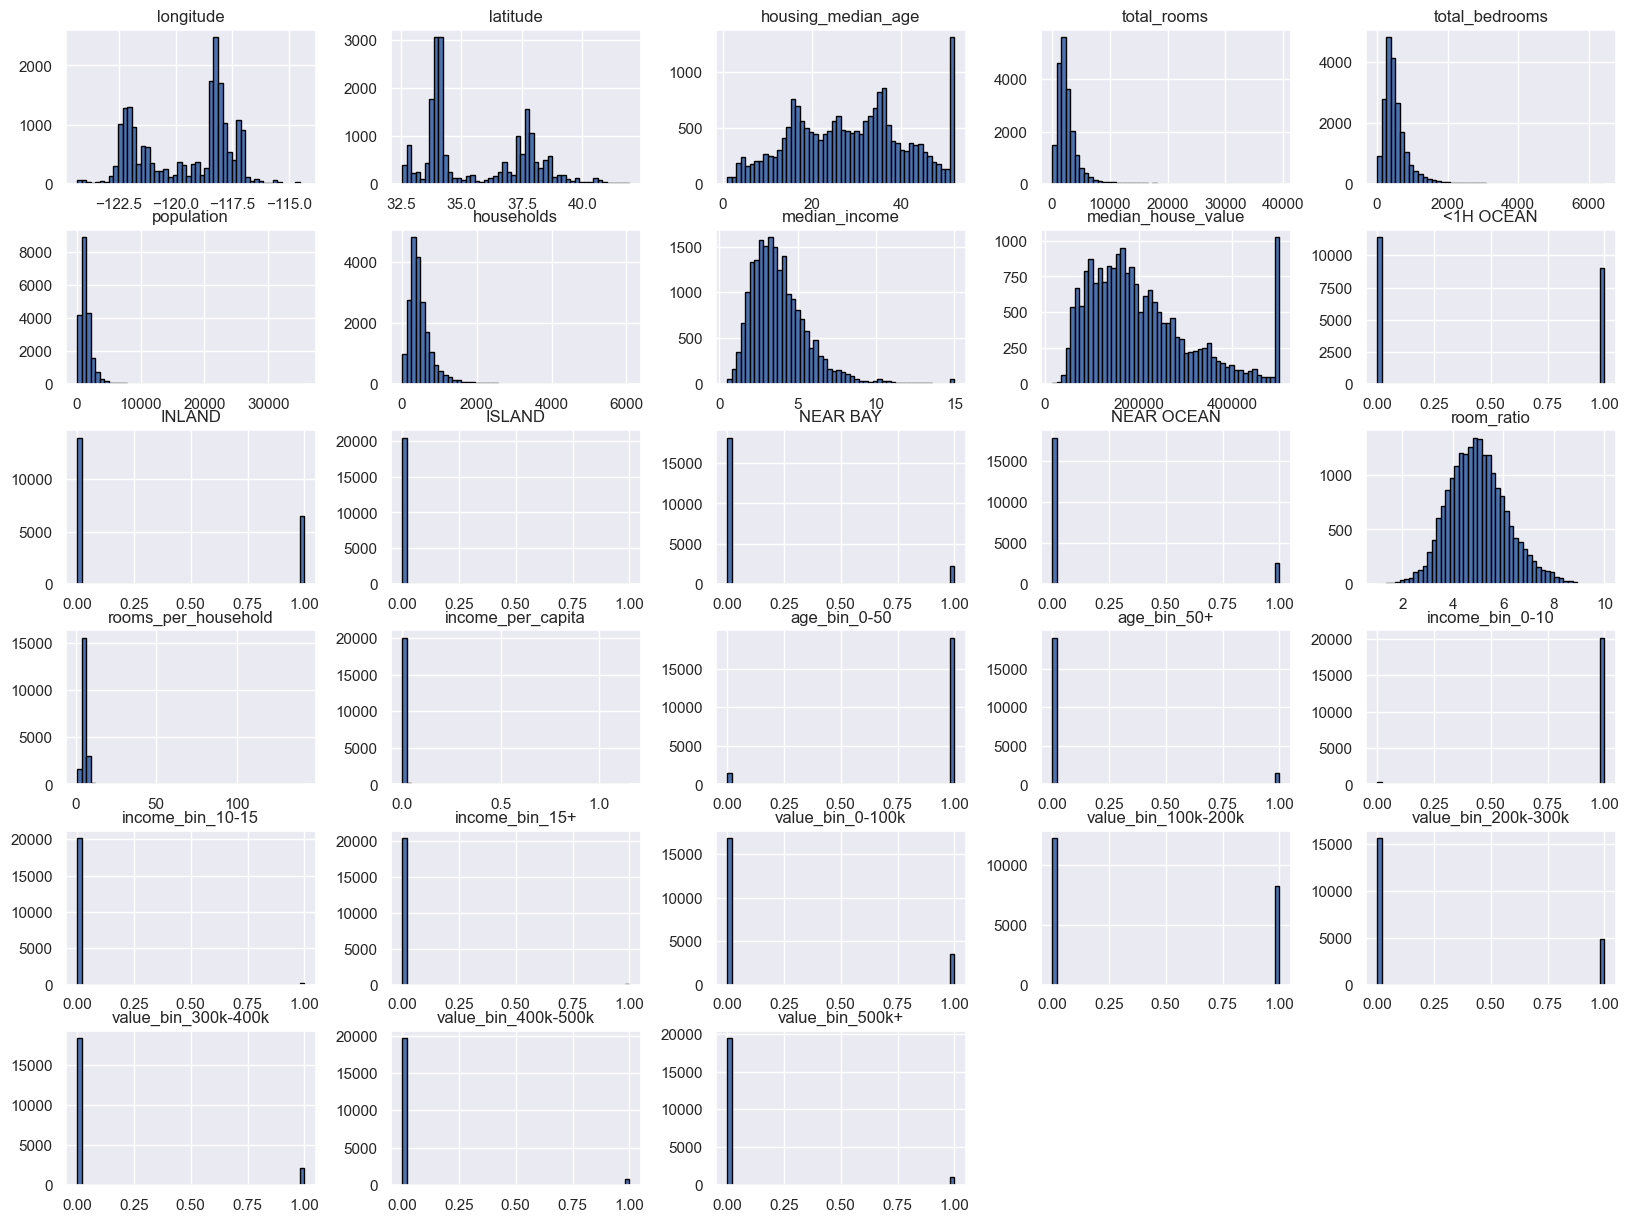

In [111]:
datos.hist(bins=50, figsize=(20,15), edgecolor='black')

In [112]:
datos.corr()['median_house_value'].sort_values(ascending=True)

value_bin_0-100k      -0.519950
INLAND                -0.484787
value_bin_100k-200k   -0.402530
income_bin_0-10       -0.295043
age_bin_0-50          -0.147011
latitude              -0.144638
longitude             -0.045398
population            -0.025300
ISLAND                 0.023525
total_bedrooms         0.049686
households             0.064894
housing_median_age     0.106432
income_per_capita      0.114895
income_bin_15+         0.120465
total_rooms            0.133294
NEAR OCEAN             0.140378
age_bin_50+            0.147011
rooms_per_household    0.151344
NEAR BAY               0.160526
value_bin_200k-300k    0.176827
<1H OCEAN              0.257614
income_bin_10-15       0.268662
room_ratio             0.383920
value_bin_300k-400k    0.399549
value_bin_400k-500k    0.400281
value_bin_500k+        0.571507
median_income          0.688355
median_house_value     1.000000
Name: median_house_value, dtype: float64

In [113]:
datos.drop('age_bin_0-50', axis=1, inplace=True)
datos.drop('age_bin_50+', axis=1, inplace=True)

<Axes: >

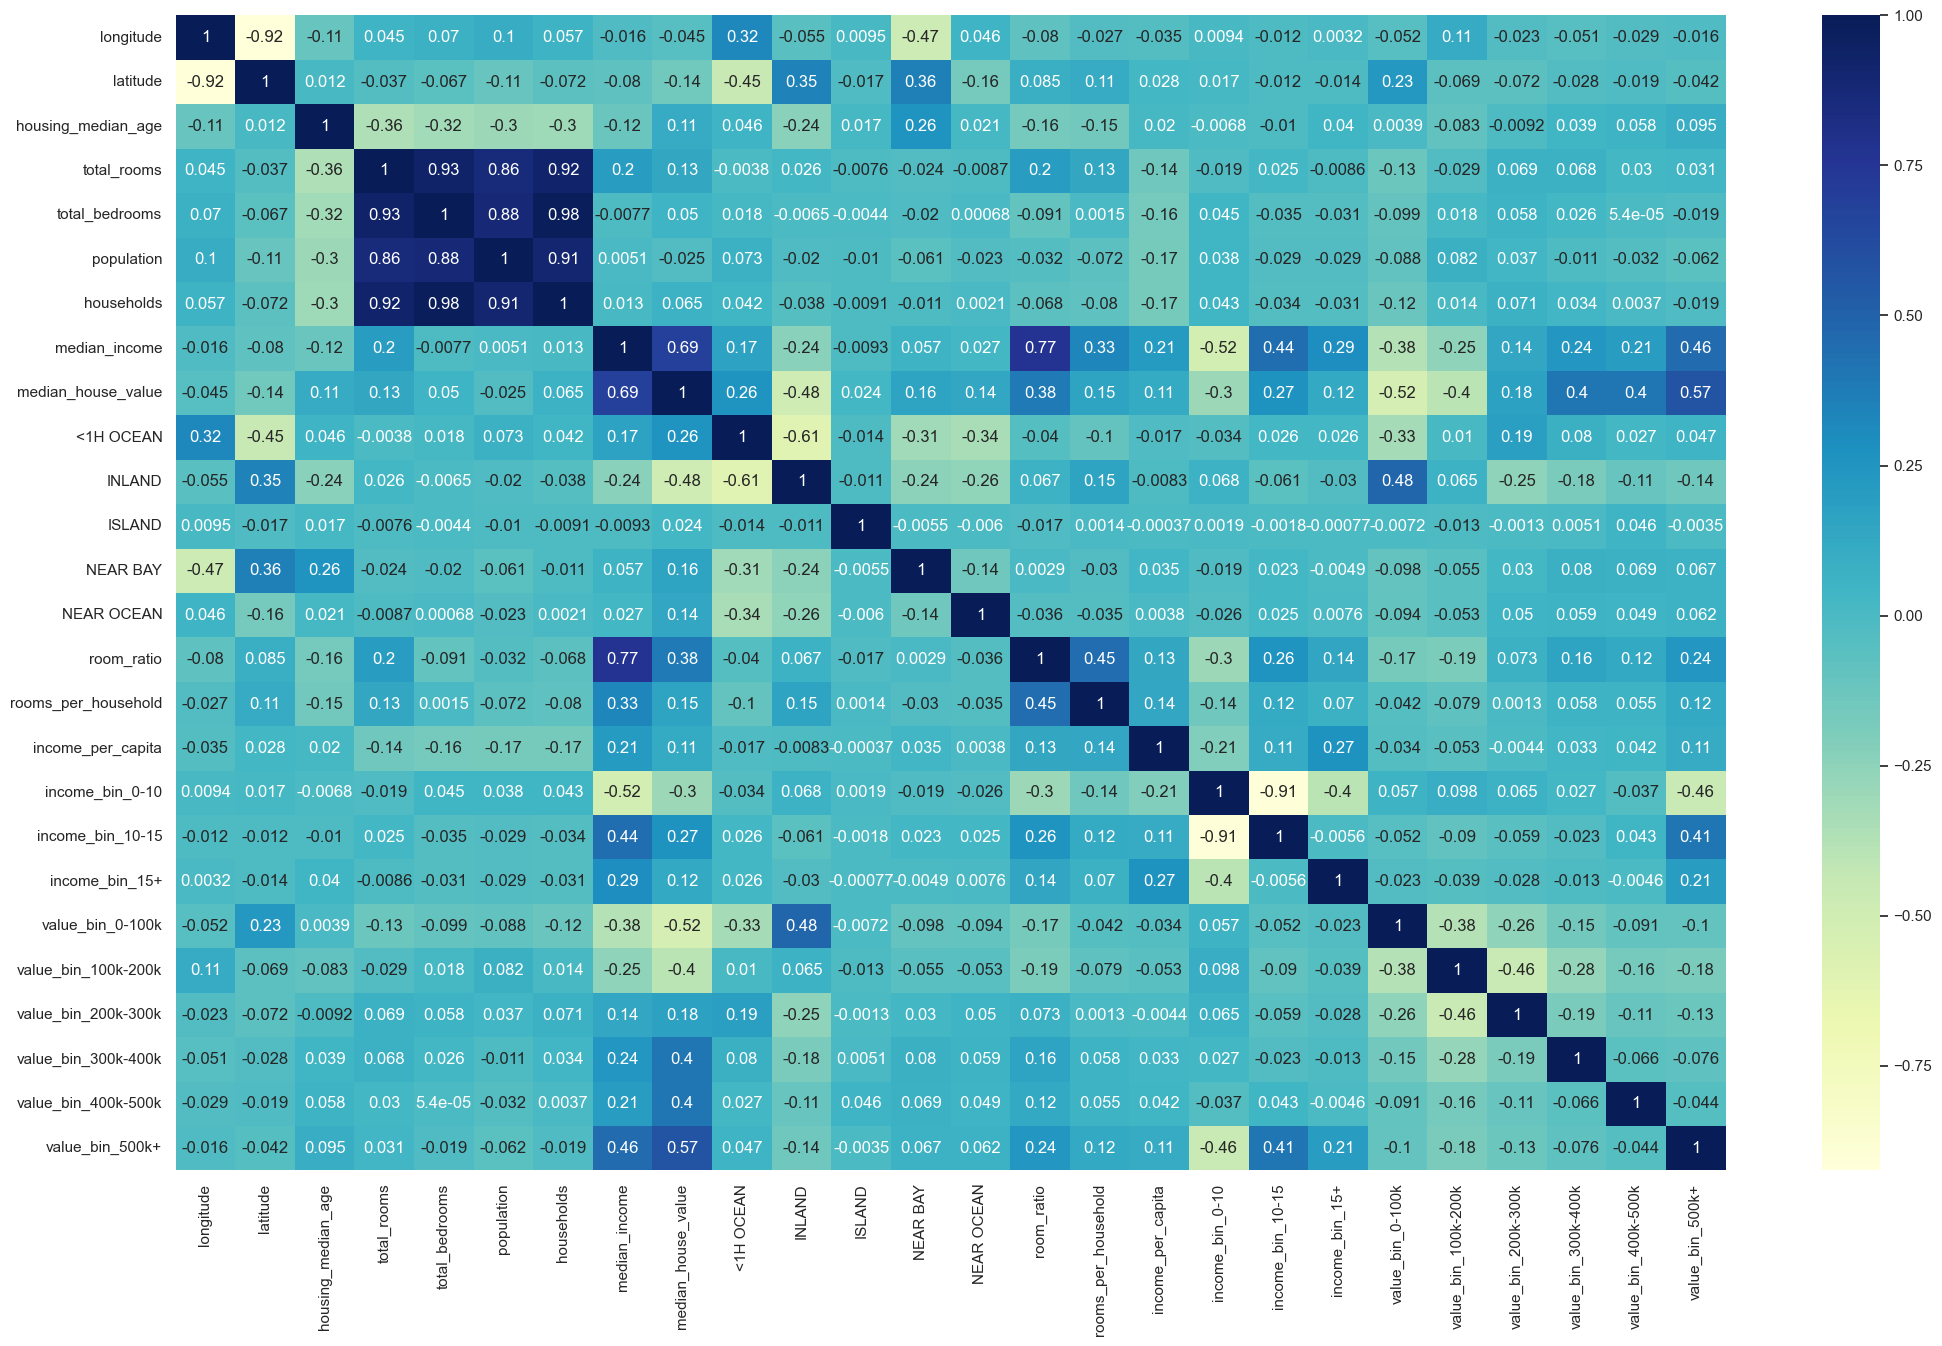

In [114]:
sb.set(rc={'figure.figsize':(25,15)})
sb.heatmap(data=datos.corr(), annot=True, cmap='YlGnBu')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>],
       [<Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>,
        <Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'room_ratio'}>],
       [<Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': 'income_per_capita'}>,
        <Axes: title={'center': 'income_bin_0-10'}>,
        <Axes: title={'center': 'income_bin_10-15'}>,
        <Axes: title={'center': 'income_bin_15+'

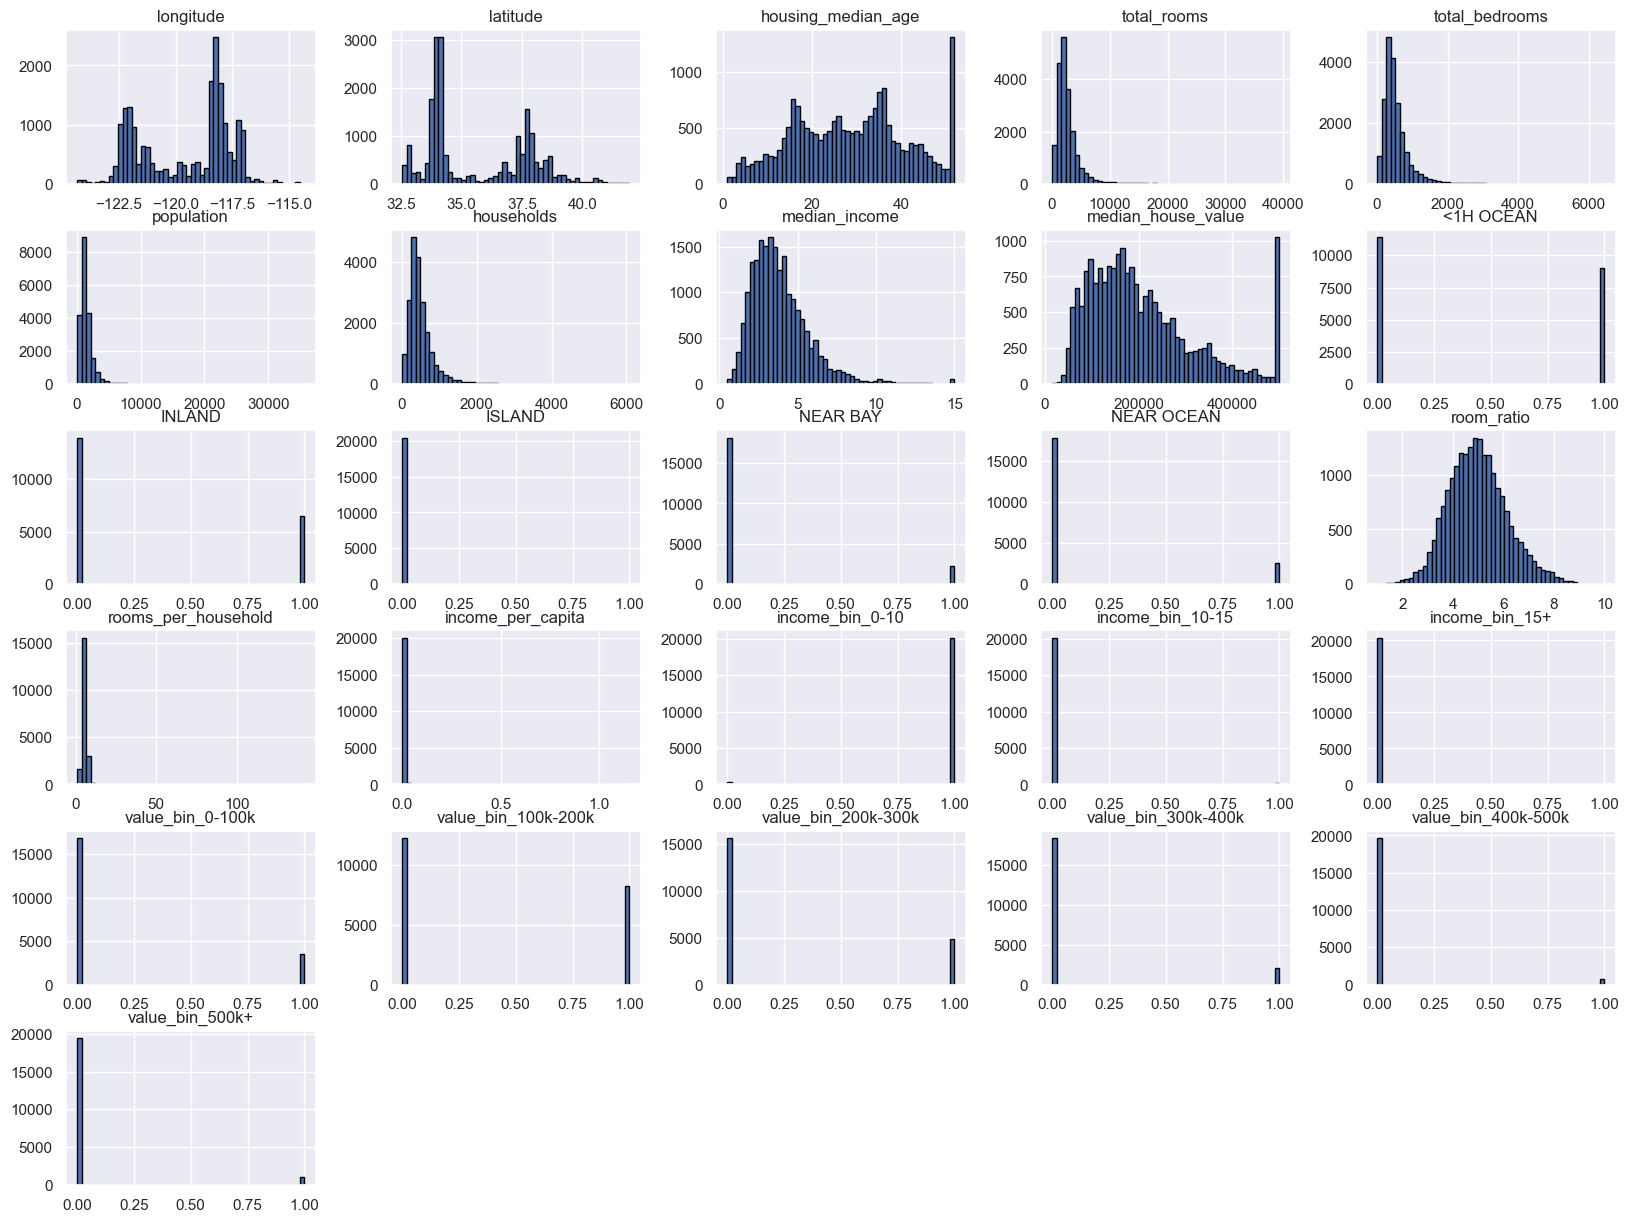

In [117]:
datos.hist(bins=50, figsize=(20,15), edgecolor='black')

In [115]:
#Reentrenamiento
X = datos.drop('median_house_value', axis=1)
y = datos['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_test)

score_test = modelo.score(X_test, y_test)
score_train = modelo.score(X_train, y_train)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)

print(f"Score test: {score_test}")
print(f"Score train: {score_train}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Score test: 0.9614189717400081
Score train: 0.9594412992780457
Mean Squared Error: 22939.322428202817
R2 Score: 0.9614189717400081


**3.** Normalizar los datos

In [116]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo.fit(X_train_scaled, y_train)
predicciones = modelo.predict(X_test_scaled)

score_test = modelo.score(X_test_scaled, y_test)
score_train = modelo.score(X_train_scaled, y_train)

mse = mean_squared_error(y_test, predicciones)
mse = np.sqrt(mse)
r2 = r2_score(y_test, predicciones)
    
print(f"Score test: {score_test}")
print(f"Score train: {score_train}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Score test: 0.961403432285136
Score train: 0.9594284918672596
Mean Squared Error: 22943.941650334258
R2 Score: 0.961403432285136


**¿El resultado fue mejor o peor?**  

R/=  Para mejorar la precisión del modelo se realizaron los siguientes cambios:    
        -Crear nuevas caracteristicas a partir de las existentes  
        -Suavizar valores atipicos  
        -Normalizar los datos  
        
Los cambios aplicados afectaron positivamente el modelo pero en diferentes medida, es decir que algunos cambios afectaron más que otros.

--Para el primer cambio, se crearon nuevas características a partir de las existentes como ser el promedio de habitaciones por hogar y el ingreso per cápita, lo que permitió observar que la precision se mantuvo con 0.65 al igual que el analisis inicial hecho en la clase que dio un score de 0.65.  

--Para el segundo cambio, se suavizaron los valores atípicos en las variables 'housing_median_age', 'median_income' y 'median_house_value' las cuales muestran en los histogramas que los datos tienen valores atípicos o limites que afectan la precisión del modelo.  
Para esto se crearon bins o intervalos para agrupar y asignar los valores en rangos y luego se volvieron a dummies. Este cambio no afectó significativamente el modelo, ya que el score se mantuvo entre 0.65 y 0.66, para el caso de 'housing_median_age' y 'median_income' respectivamente.
Sin embargo al crear bins para 'median_house_value' para agrupar los valores en rangos para de cierta forma asignar o categorizar los valores de la variable, en categorias como **'0-500k'** y  **'500k+'** se logró mejorar el modelo hasta aproximadamente un score_test de 0.73.  
Luego aumentando el número y rango de bins para 'median_house_value' se logró mejorar el modelo hasta aproximadamente un score_test de 0.95.
Lo cual indica que este cambio afectó significativamente el modelo.  

--Para el tercer cambio, se normalizaron los datos, lo cual no afectó significativamente el modelo, ya que el score se mantuvo en 0.95 todavía.


**¿Por qué crees que es así? Por qué son necesarios los cambios aplicados 
(fundamento del porqué afecta esos cambios)**  

R/= --La creación de nuevas características, como el promedio de habitaciones por hogar y el ingreso per cápita,no tuvo un efecto positivo ya que el modelo aún depende en gran medida de otras variables principales. A pesar de esto, agregar caracteristicas coherentes nuevas puede mejorar en cierta medida la comprensión del modelo, incluso si el cambio en el desempeño no es tan drastico.  

--La suavización de valores atípicos (los limites fijos que presentaban ciertas caracteristicas) tuvo un impacto positivo en el modelo, ya que los valores atípicos pueden sesgar los modelos y afectar la precisión, especialmente en algoritmos sensibles como la regresión lineal. El uso de los bins para agrupar estos valores en intervalos manejables ayuda a reducir su impacto. En el caso de la variable 'median_house_value', categorizar los precios en intervalos simplificó la relación entre esta variable y las características, lo que le facilitó al modelo identificar patrones relevantes.  

En una primera agrupación, dividir los precios en categorías básicas, como "0-500k" y "500k+", mejoró el score a 0.70. Esto muestra que el modelo pudo captar mejor las relaciones dentro de los datos agrupados y reducir la dispersión, simplificando el análisis. Más adelante, al aumentar el número y rango de los bins, el score alcanzó 0.95, indicando que una segmentación más fina permite capturar con mayor precisión la variabilidad de los precios, ajustando las predicciones de forma significativa.
Sin embargo, este impacto no fue uniforme en todas las variables. Por ejemplo, en 'housing_median_age' no generó mejoras considerables, ya que esta variable no mostraba una relación tan fuerte con la predicción del precio como 'median_house_value'.

Al uso de bins o intervalos se le llama binning o discretización, y es una técnica común para manejar valores atípicos y mejorar la precisión de los modelos. Esta técnica es necesaria en este caso porque: 
-Reduce el impacto de valores atípicos.
-Simplifica las relaciones complejas en los datos, haciendo más manejables las predicciones para el modelo.
-Al incrementar el número de bins puede mejorar la granularidad y precisión del modelo al encontrar patrones más detallados.
Bibliogarfía: https://medium.com/@gunkurnia/binning-data-a-guide-to-data-transformation-and-categorization-3e9bff15e1a9


